# Movie Reviews Classification
  * Positive
  * Neutral
  * Negative

# Get data

## Load data from drive

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/data/data_shuffled.pkl' '/content'

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data = pd.read_pickle('/content/data_shuffled.pkl')
data

,Review,Rate,Label
0,ok maybe loosely based true loose ever actually actor series come across complete idiot fighting charge bumbling ever turn doesnt really sound interestingeven im take partially true would watch su...,1,negative
1,know slog along promising big reveal never deliver well go cant sleep,1,negative
2,binged first three episode honestly cant wait next week instalment great lot interesting twist finger crossed high standard maintained right episode impressive faralyla browne magnificent job play...,9,positive
3,inspection drama starring jeremy pope elli french young gay black man join marine escape abusive mother find place worldthis powerful emotional experience pope give incredible performance elli str...,8,positive
4,saw back sundance festivalthe neighbor john levi witness supernatural event los angeles apartment building realize documenting paranormal could inject fame fortune wasted life everdeeper darker ra...,7,positive
...,...,...,...
73982,love director last shin godzilla focus bureaucratic struggle well visually astonishing creature messing around actual city tokyo authenticity quite new contributes multlayered attractiveness lates...,3,negative
73983,first miniseries amazing start finish cast great matthew goode really steal robert evans god im surprised golden globe never considered nomination rare miniseries come along take back history see ...,10,positive
73984,recorded hoped see scenery glacier national park presented obvious right away wasnt glacier national park thought must canadian glacier national park much farther north along tch nope either turn ...,5,neutral
73985,saw sneak preview today wife im veteran player dm shes never played laughed whole thing riveted action sequence indicating excellent intro world dd inexperienced enchanted got right iconic monster...,9,positive


In [ ]:
reviews = list(data['Review'])
labels = list(data['Label'])

## Label encoding

In [ ]:
classes = ['positive', 'neutral', 'negative']
label_mapping = {label: idx for idx, label in enumerate(classes)}

labels = [label_mapping[label] for label in labels]

## Train/Valid/Test split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, stratify=labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

print(len(X_train))
print(len(X_val))
print(len(X_test))

47351
11838
14798


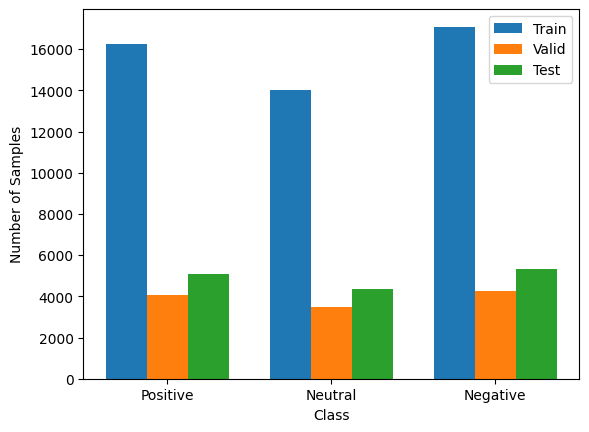

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_counts = pd.Series(y_train).value_counts().sort_index(ascending=True)
valid_counts = pd.Series(y_val).value_counts().sort_index(ascending=True)
test_counts = pd.Series(y_test).value_counts().sort_index(ascending=True)

train_samples = [train_counts[0], train_counts[1], train_counts[2]]  # Số mẫu của từng class trong tập train
valid_samples = [valid_counts[0], valid_counts[1], valid_counts[2]]  # Số mẫu của từng class trong tập valid
test_samples = [test_counts[0], test_counts[1], test_counts[2]]      # Số mẫu của từng clas trong tập test

# Số lượng class
num_classes = len(train_samples)

# Tạo các index cho các class
class_indices = np.arange(num_classes)

# Độ rộng của cột
bar_width = 0.25

# Vẽ biểu đồ
class_names = ['Positive', 'Neutral', 'Negative']
plt.bar(class_indices, train_samples, width=bar_width, label='Train')
plt.bar(class_indices + bar_width, valid_samples, width=bar_width, label='Valid')
plt.bar(class_indices + 2 * bar_width, test_samples, width=bar_width, label='Test')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(class_indices + bar_width, class_names)
plt.legend()
plt.show()

## TF-IDF & BOW

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(max_features=10000)
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

# X_train = X_train.toarray()
# X_test = X_test.toarray()

# (X_train.shape, X_test.shape)

# Modeling

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Naive Bayes

**Hyperparameter tuning with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]}
model = MultinomialNB()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]},
             scoring='accuracy')

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'alpha': 1.0}
Best Score:  0.7023165080252454


In [ ]:
param_grid = {'alpha': [0.8, 1.0, 1.2]}
model = MultinomialNB()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.8, 1.0, 1.2]}, scoring='accuracy')

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'alpha': 1.2}
Best Score:  0.7029104203139482


In [ ]:
param_grid = {'alpha': [1.2, 1.3, 1.4]}
model = MultinomialNB()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1.2, 1.3, 1.4]}, scoring='accuracy')

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'alpha': 1.2}
Best Score:  0.7029104203139482


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.3)
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3)

### TF-IDF

In [ ]:
# Predict on the train set
y_pred = nb_classifier.predict(X_train)

# Evaluate the classifier
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     13400
           1       0.77      0.79      0.78     13994
           2       0.82      0.82      0.82     12998

    accuracy                           0.82     40392
   macro avg       0.82      0.82      0.82     40392
weighted avg       0.82      0.82      0.82     40392



In [ ]:
# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      4187
           1       0.63      0.68      0.66      4374
           2       0.73      0.70      0.72      4062

    accuracy                           0.72     12623
   macro avg       0.73      0.72      0.72     12623
weighted avg       0.72      0.72      0.72     12623



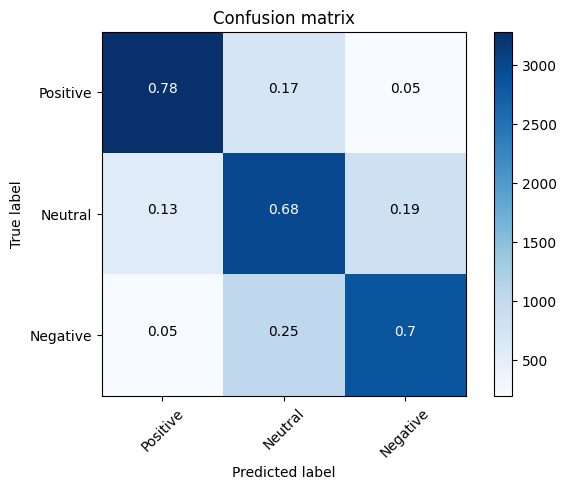

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

classes = ['Positive', 'Neutral', 'Negative']
plot_confusion_matrix(cm, classes)

### BOW

In [ ]:
# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4187
           1       0.67      0.64      0.65      4374
           2       0.71      0.76      0.74      4062

    accuracy                           0.73     12623
   macro avg       0.73      0.73      0.73     12623
weighted avg       0.73      0.73      0.73     12623



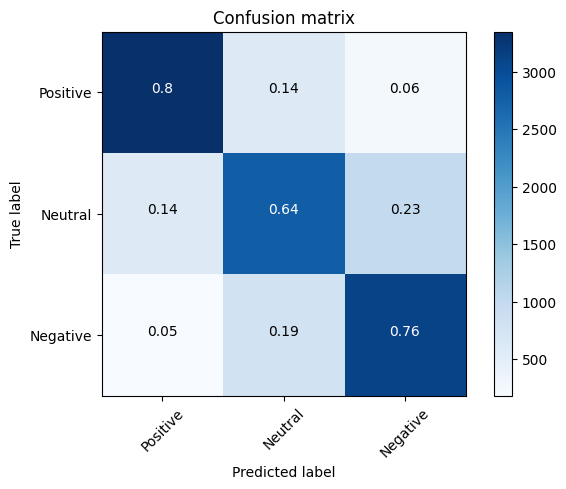

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

classes = ['Positive', 'Neutral', 'Negative']
plot_confusion_matrix(cm, classes)

## BiLSTM

In [ ]:
# one-hot encoding
num_classes = len(np.unique(y_train))
y_train = np.eye(num_classes)[y_train]
y_val = np.eye(num_classes)[y_val]
y_test = np.eye(num_classes)[y_test]

In [ ]:
vector_size = 10000

### Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras import regularizers

model = Sequential(name='Bidirectional_LSTM')
model.add(Bidirectional(LSTM(100), input_shape=(1, vector_size)))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 200)               8080800   
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 8101203 (30.90 MB)
Trainable params: 8101203 (30.90 MB)
Non-trainable params: 0 (0.00 Byte)
________

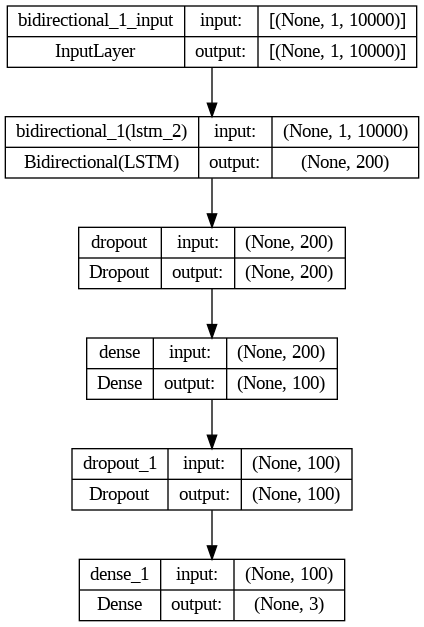

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
import warnings

# Filter out UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

# Define a filepath for the checkpoint
filepath = "/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/model/model_checkpoint.h5"

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(5e-5),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1578/1578 [==============================] - 137s 84ms/step - loss: 0.9397 - accuracy: 0.5088 - val_loss: 0.7847 - val_accuracy: 0.6206
Epoch 2/20
1578/1578 [==============================] - 72s 46ms/step - loss: 0.7263 - accuracy: 0.6608 - val_loss: 0.6974 - val_accuracy: 0.6867
Epoch 3/20
1578/1578 [==============================] - 68s 43ms/step - loss: 0.6426 - accuracy: 0.7174 - val_loss: 0.6550 - val_accuracy: 0.7148
Epoch 4/20
1578/1578 [==============================] - 67s 42ms/step - loss: 0.5981 - accuracy: 0.7451 - val_loss: 0.6477 - val_accuracy: 0.7267
Epoch 5/20
1578/1578 [==============================] - 64s 41ms/step - loss: 0.5737 - accuracy: 0.7575 - val_loss: 0.6364 - val_accuracy: 0.7292
Epoch 6/20
1578/1578 [==============================] - 63s 40ms/step - loss: 0.5574 - accuracy: 0.7659 - val_loss: 0.6470 - val_accuracy: 0.7271
Epoch 7/20
1578/1578 [==============================] - 65s 41ms/step - loss: 0.5449 - accuracy: 0.7720 - val_loss: 0.6377 

### Result

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

395/395 [==============================] - 7s 16ms/step - loss: 0.6872 - accuracy: 0.7248
Test Loss: 0.687232255935669
Test Accuracy: 0.7247880697250366


In [ ]:
from sklearn.metrics import classification_report

# Predict on the train set
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_train, axis=1), y_pred))

1578/1578 [==============================] - 31s 19ms/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     16750
           1       0.79      0.72      0.75     17493
           2       0.79      0.85      0.82     16247

    accuracy                           0.82     50490
   macro avg       0.82      0.82      0.82     50490
weighted avg       0.82      0.82      0.82     50490



In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_test, axis=1), y_pred))

395/395 [==============================] - 5s 13ms/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4187
           1       0.68      0.61      0.64      4374
           2       0.71      0.76      0.73      4062

    accuracy                           0.72     12623
   macro avg       0.72      0.73      0.72     12623
weighted avg       0.72      0.72      0.72     12623



(0.0, 0.9766228437423706)

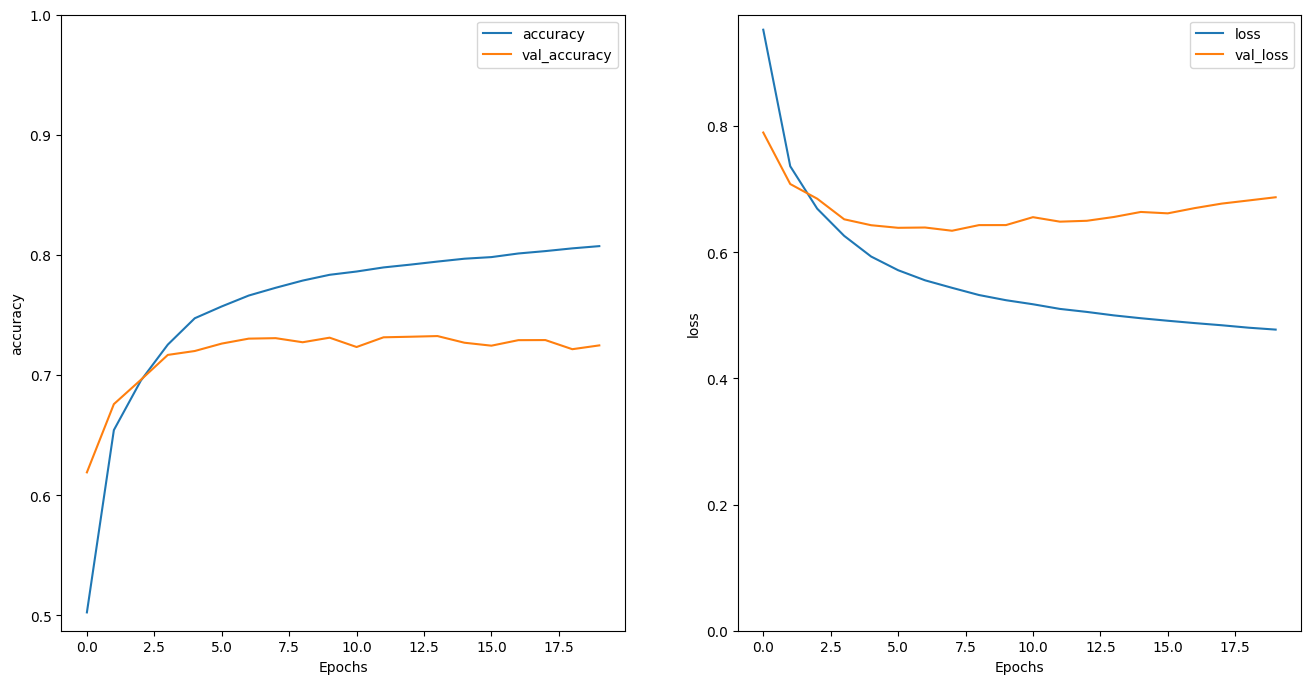

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

395/395 [==============================] - 5s 13ms/step


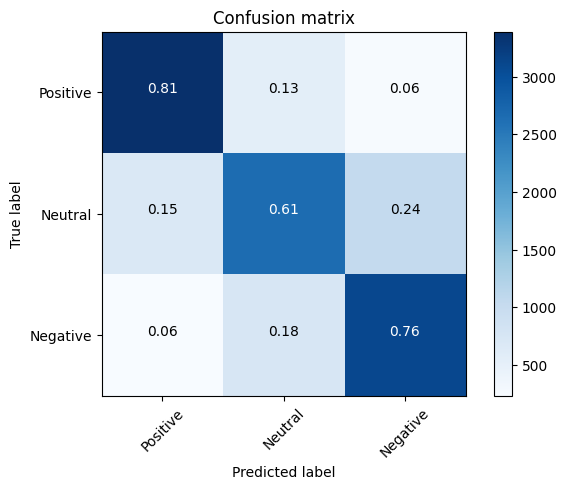

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

classes = ['Positive', 'Neutral', 'Negative']
plot_confusion_matrix(cm, classes)

### Save to drive

In [ ]:
# Lưu model
model.save('/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/model/bi_lstm.h5')